# Описание проекта

<p>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</p>
<p><em><b>Описание данных</b></em></p>
<ul>
 <li><b>Name</b> — название игры</li>
 <li><b>Platform</b> — платформа</li>
 <li><b>Year_of_Release</b> — год выпуска</li>
 <li><b>Genre</b> — жанр игры</li>
 <li><b>NA_sales</b> — продажи в Северной Америке (миллионы проданных копий)</li>
 <li><b>EU_sales</b> — продажи в Европе (миллионы проданных копий)</li>
 <li><b>JP_sales</b> — продажи в Японии (миллионы проданных копий)</li>
 <li><b>Other_sales</b> — продажи в других странах (миллионы проданных копий)</li>
 <li><b>Critic_Score</b> — оценка критиков (максимум 100)</li>
 <li><b>User_Score</b> — оценка пользователей (максимум 10)</li>
 <li><b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)</li>
</ul>

<h2>Изучение общей информации</h2>

1) Откроем данные и посмотрим, какие параметры есть в таблице, типы данных и количество ненулевых значений. Построим гистаграммы для общего представления данных

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
data=pd.read_csv('/datasets/games.csv')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


2) Посмотрим количество отсутствующих значений

In [ ]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Предварительные выводы:
<ol>
    <li>в датасете 6 столбцов с численными данными и 5 столбцов с  тиопм object. Здесь могут быть как текстовые, так и смешанные числовые и нечисловые значения. Уточним эти данные в дальнейшем;</li>
    <li>названия столбцов записаны с загланых букв, запишем имена столбцов в нижнем регистре;
<li>Year_of_Release есть нулевые значения;</li>
<li>Genre в некоторых строках отсутствуют значения;</li>
<li>Critic_Score есть нулевые значения;
<li>User_Score в некоторых строках отсутствуют значения;
<li>Rating в некоторых строках отсутствуют значения;
<li>В столбце Critic_Score необходимо поменять тип на float64
<li>В столбце User_Score необходимо поменять тип на float64
</ul>

<h2>Подготовка данных</h2>

### Изменим регистр букв в названиях столбцов и посмотрим содержание датасета:

In [ ]:
data.columns = map(str.lower, data.columns)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Поменяем тип данных в столбцах, где это необходимо

Заменим тип данных в столбце <b>year_of_release</b> на целочисленный. Для этого удалим пропуски (которые не сильно изменят общую картину данных)

In [ ]:
data.dropna(subset=['year_of_release','genre'],inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int64')

Изменим регистр букв в столбце <b>genre</b>:

In [ ]:
data['genre']=data['genre'].str.lower()

In [ ]:
#Удалим пропуски в столбце 'genre', это также не повлияет на исследование, т.к. пропусков всего 2
data = data.dropna(subset=['genre'])

In [ ]:
pd.DataFrame(data.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
critic_score,51.453418
rating,40.598395
user_score,40.166626
other_sales,0.000000
jp_sales,0.000000
eu_sales,0.000000
na_sales,0.000000
genre,0.000000
year_of_release,0.000000
platform,0.000000


Исходя из выше представленной таблицы, можно заключить, что пропуски в столбцах "critic_score","rating" и "user_score" лучше оставить как есть, т.к. слишком большой процент пропущенных значений. Эти пропуски можно обработать в дальнейшем.

Посмотрим, какие значения присутствуют в столбце с оценкой пользователей "user_score".  

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что в стобце 'user_score' тип данных object. Целесообразно изменить тип на числовой, а именно на float64. Однако там есть значение 'tbd', которое не позволит сразу это сделать. Аббревиатуру 'tbd' означает "подлежит определению", поэтому заменим эти значения NaN, с целью возможной обработки.

In [ ]:
data.user_score = data.user_score.replace('tbd', float("NaN"))

In [ ]:
data['user_score'] = data['user_score'].astype('float64')

<i>Посмотрим, что у нас получилось:</i>

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


In [ ]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

<div class="alert-warning">
<b>Комментарий ревьюера 💡</b>

Тут стоит обращать внимание на то, что есть рейтинги, которые встречаются в силшком малом количестве (1, 3, 8 раз). Такие значения можно объединять с более крупными категориями. Либо вообще удалять.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 'sales_sum'.

In [ ]:
data['sales_sum'] = data['na_sales'] +data['eu_sales']+data['jp_sales']+data['other_sales']

In [ ]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы:

In [ ]:
data['name'].groupby(data['year_of_release']).count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

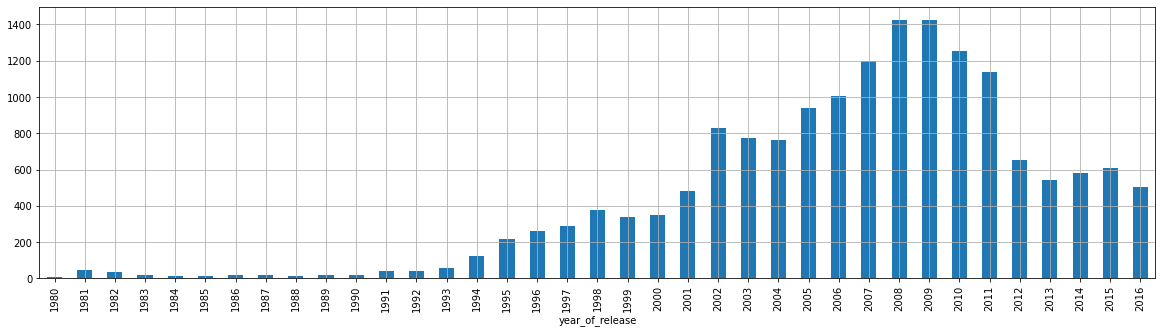

In [ ]:
#Посторим гистограмму для большей наглядности
data['name'].groupby(data['year_of_release']).count().plot(kind="bar",grid=True, figsize = (20,5))

Из представленного графика, можем заключить, что больше всего игр было выпущено в 2008 и 2009 годах. С 1995 года начианается заметное увеличение количества игр, а в 2002 произошел резкий скачок в данных

### Посмотрим, как менялись продажи по платформам:

Для этого выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определимся, какой период будет показательным относительно возникновения новых и исчезновения старых платформ.

In [ ]:
platforms_rating=data.groupby('platform')['sales_sum'].sum().sort_values(ascending=False)
print(platforms_rating)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sales_sum, dtype: float64


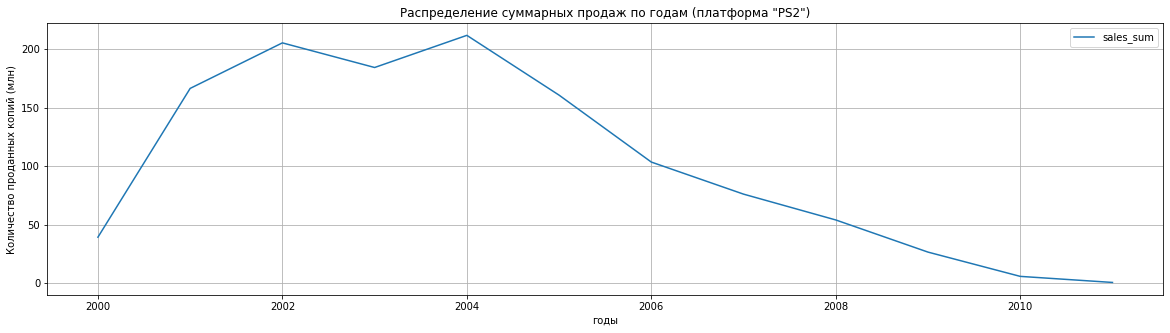

In [ ]:
data.query('platform=="PS2"').pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
    grid=True,
    figsize=(20, 5),
      )
plt.title('Распределение суммарных продаж по годам (платформа "PS2")')
plt.xlabel('годы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

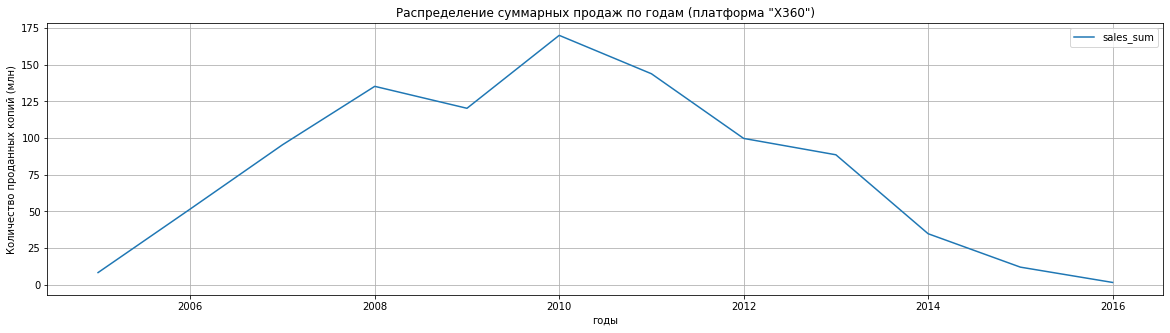

In [ ]:
data.query('platform=="X360"').pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
    grid=True,
    figsize=(20, 5),
      )
plt.title('Распределение суммарных продаж по годам (платформа "X360")')
plt.xlabel('годы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

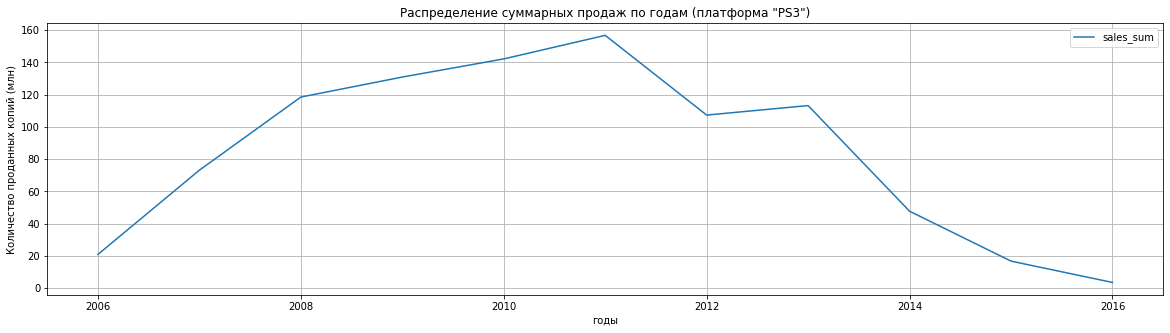

In [ ]:
data.query('platform=="PS3"').pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
    grid=True,
    figsize=(20, 5),
      )
plt.title('Распределение суммарных продаж по годам (платформа "PS3")')
plt.xlabel('годы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

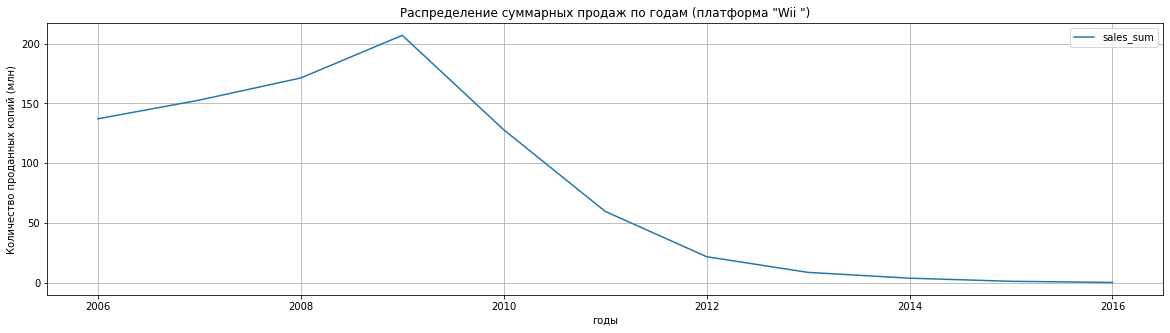

In [ ]:
data.query('platform=="Wii"').pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
    grid=True,
    figsize=(20, 5),
      )
plt.title('Распределение суммарных продаж по годам (платформа "Wii ")')
plt.xlabel('годы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

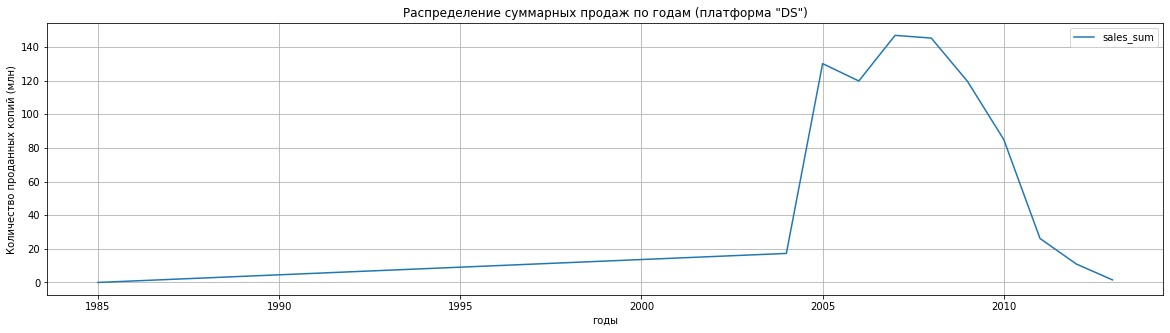

In [ ]:
data.query('platform=="DS"').pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
    grid=True,
    figsize=(20, 5),
      )
plt.title('Распределение суммарных продаж по годам (платформа "DS")')
plt.xlabel('годы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

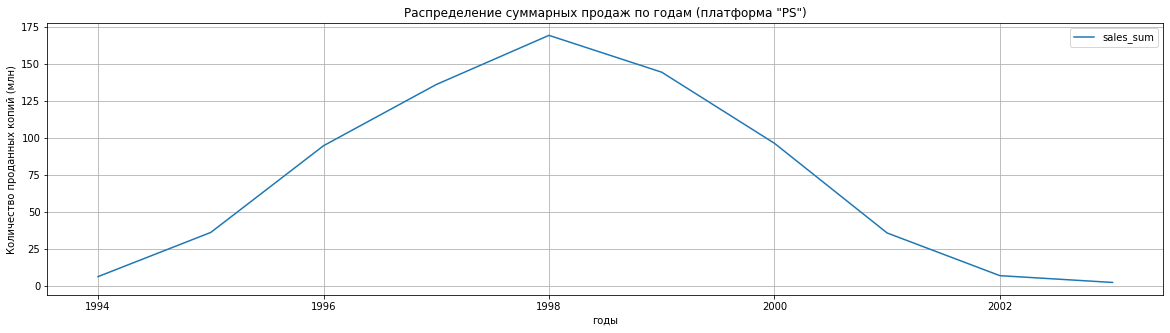

In [ ]:
data.query('platform=="PS"').pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
    grid=True,
    figsize=(20, 5),
      )
plt.title('Распределение суммарных продаж по годам (платформа "PS")')
plt.xlabel('годы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

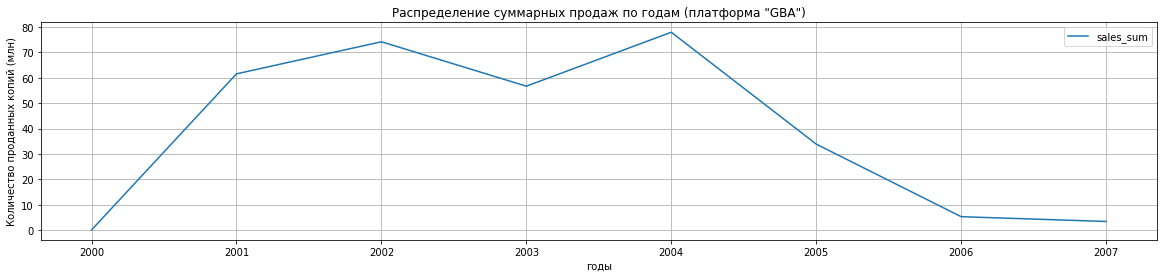

In [ ]:
data.query('platform=="GBA"').pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
    grid=True,
    figsize=(20,4),
      )
plt.title('Распределение суммарных продаж по годам (платформа "GBA")')
plt.xlabel('годы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

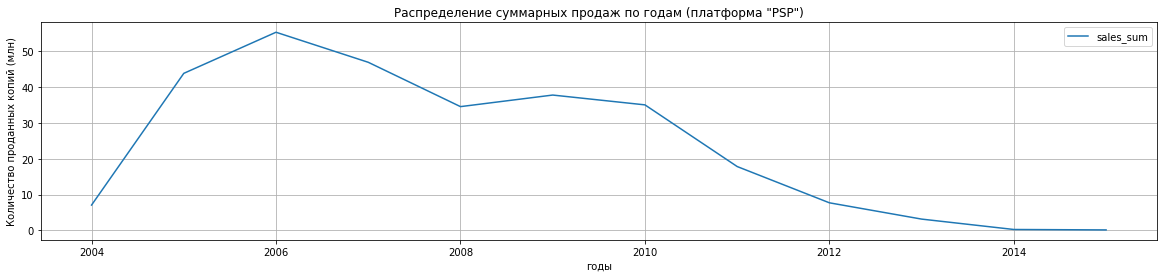

In [ ]:
data.query('platform=="PSP"').pivot_table(index='year_of_release', values='sales_sum', aggfunc='sum').plot(
    grid=True,
    figsize=(20,4),
      )
plt.title('Распределение суммарных продаж по годам (платформа "PSP")')
plt.xlabel('годы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

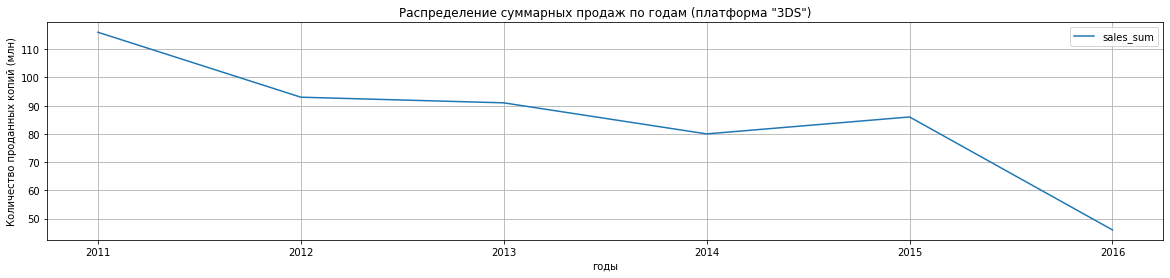

In [ ]:
data.query('platform=="3DS"').pivot_table(index='year_of_release', values='sales_sum', aggfunc='count').plot(
    grid=True,
    figsize=(20,4),
      )
plt.title('Распределение суммарных продаж по годам (платформа "3DS")')
plt.xlabel('годы')
plt.ylabel('Количество проданных копий (млн)')
plt.show()

Исходя из выше представленных графиков, можно заключить, что показательным может быть период с 2014 по 2016 годы.

### Проанализируем данные за период с 2014 по 2016 годы

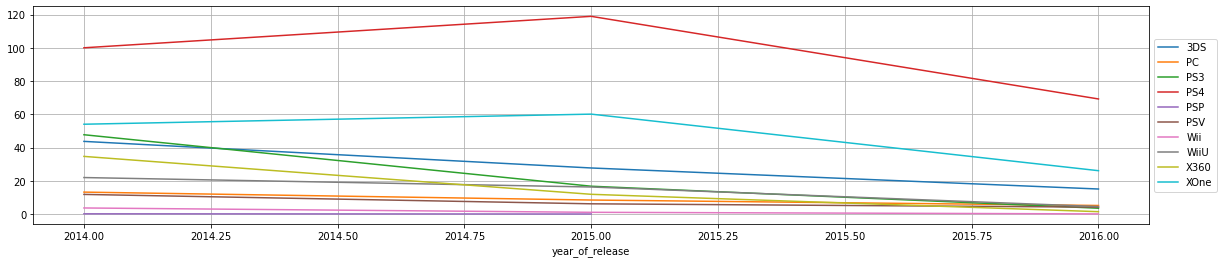

In [ ]:

data.query('2013<year_of_release<=2016').pivot_table(index='year_of_release',columns = 'platform', values='sales_sum', aggfunc='sum').plot(grid=True,figsize=(20,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


Лидерами по продажам на конец рассматриваемого периода можно считать платформы  <b>PS4, 3DS, XOne </b>. Про остальные платформы можно утверждать, что популярность их снизилась практически до нуля и продажи упали. Надо также отметить, что период снижения продаж был более пролонгированнным, в отличие от новых платформ, здесь уровень падения продаж скорее всего будет более стремительным. Это вероятно объясняется тем, что темп развития технологии увеличивается с каждым годом. Будет происходить более быстрая смена платформ.

### Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам

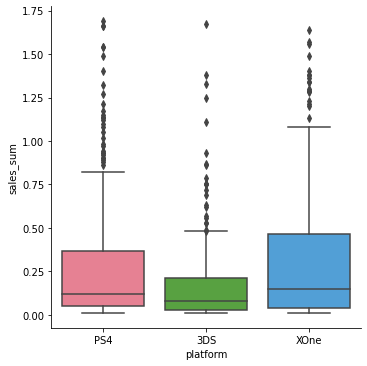

In [ ]:
data_after2014 = data.query('year_of_release>= 2014')
data_new=data_after2014.query('(platform=="PS4" |platform=="3DS" | platform=="XOne") & sales_sum<1.7')
for column in ['platform']:
    sns.catplot(x=column, y="sales_sum", kind="box", data=data_new, palette='husl')

Диаграммма размаха лидеров продаж демонстирирует наличие выбросов в сторону больших объемов продаж. Медианные значения платформ PS4,  и XOne практически совпадают, что говорит о том, что они одинаково пока хорошо продаются, в отличие от других.

Посмотрим, как влияли на продажи внутри популярной платформы "PS4" отзывы пользователей и критиков.

Построим диаграммы рассеяния зависимостей от мнения пользователей и критиков

In [ ]:
data_PS4=data_after2014.query('platform=="PS4" & sales_sum<2')

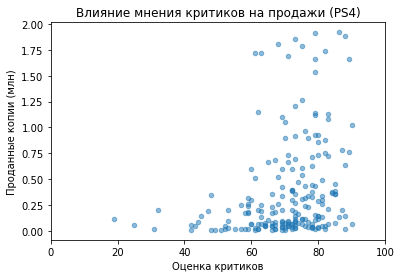

In [ ]:
data_PS4.plot(x='critic_score', y='sales_sum',kind='scatter', alpha=0.5)
plt.xlim(0, 100)

plt.title('Влияние мнения критиков на продажи (PS4)')
plt.xlabel('Оценка критиков')
plt.ylabel('Проданные копии (млн)')
plt.show()

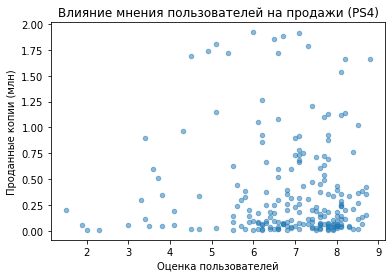

In [ ]:
data_PS4.plot(x='user_score', y='sales_sum',kind='scatter', alpha=0.5)
plt.title('Влияние мнения пользователей на продажи (PS4)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Проданные копии (млн)')
plt.show()

Найдем корреляцию между отзывами и продажами.

In [ ]:
cols=['sales_sum','user_score','critic_score']
data_PS4[cols].corr()

,sales_sum,user_score,critic_score
sales_sum,1.000000,-0.021709,0.297050
user_score,-0.021709,1.000000,0.600533
critic_score,0.297050,0.600533,1.000000


Диаграммы рассеяния по платформе PS4, а также коэффициенты корреляции показывают, что мнения критиков имеют влияние на уровень продаж, однако это достаточно низкая зависимость (по результатам корреляции).

Посмотрим, будет ли заметно влияние на других платформах

In [ ]:
data_3DS=data_after2014.query('platform=="3DS" & sales_sum<2')

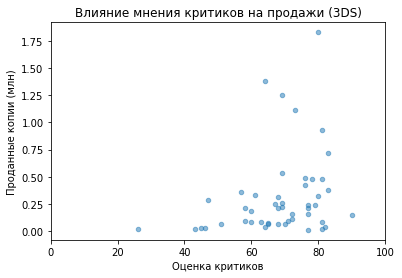

In [ ]:
data_3DS.plot(x='critic_score', y='sales_sum',kind='scatter', alpha=0.5)
plt.xlim(0, 100)

plt.title('Влияние мнения критиков на продажи (3DS)')
plt.xlabel('Оценка критиков')
plt.ylabel('Проданные копии (млн)')
plt.show()

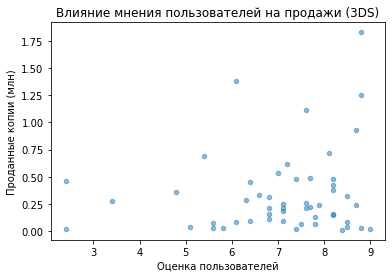

In [ ]:
data_3DS.plot(x='user_score', y='sales_sum',kind='scatter', alpha=0.5)
plt.title('Влияние мнения пользователей на продажи (3DS)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Проданные копии (млн)')
plt.show()

In [ ]:
cols=['sales_sum','user_score','critic_score']
data_3DS[cols].corr()

,sales_sum,user_score,critic_score
sales_sum,1.000000,0.151447,0.274356
user_score,0.151447,1.000000,0.851984
critic_score,0.274356,0.851984,1.000000


In [ ]:
data_XOne=data_after2014.query('platform=="XOne" & sales_sum<2')

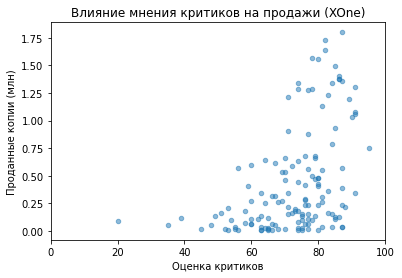

In [ ]:
data_XOne.plot(x='critic_score', y='sales_sum',kind='scatter', alpha=0.5)
plt.xlim(0, 100)

plt.title('Влияние мнения критиков на продажи (XOne)')
plt.xlabel('Оценка критиков')
plt.ylabel('Проданные копии (млн)')
plt.show()

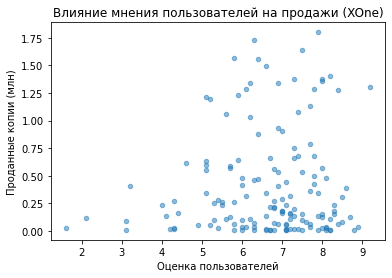

In [ ]:
data_XOne.plot(x='user_score', y='sales_sum',kind='scatter', alpha=0.5)
plt.title('Влияние мнения пользователей на продажи (XOne)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Проданные копии (млн)')
plt.show()

In [ ]:
cols=['sales_sum','user_score','critic_score']
data_XOne[cols].corr()

,sales_sum,user_score,critic_score
sales_sum,1.000000,0.089515,0.456747
user_score,0.089515,1.000000,0.512276
critic_score,0.456747,0.512276,1.000000


Анализ других платформ подтверждает предыдущий вывод: умеренная зависимость между объёмом продаж и мнением критиков присутствует, однако мнение простых пользователей мало учитывается.

### Проведем исследование общего распределения игр по жанрам

In [ ]:
genre_rating=data_after2014.groupby('genre')['sales_sum'].sum().sort_values(ascending=False)
print(genre_rating)

genre
action          199.36
shooter         170.94
sports          109.48
role-playing    101.44
misc             37.55
fighting         28.22
racing           27.52
platform         18.09
adventure        17.55
simulation       13.13
strategy          3.96
puzzle            2.21
Name: sales_sum, dtype: float64


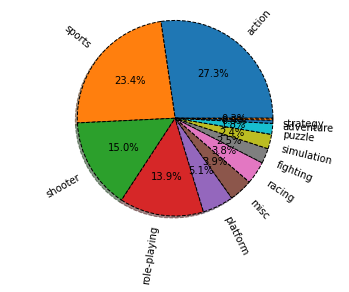

In [ ]:
labels = ['action','sports' ,'shooter','role-playing','platform' ,'misc' ,'racing', 'fighting' , 'simulation' ,'puzzle',
 'adventure' ,'strategy']
fig, ax = plt.subplots()
ax.pie(genre_rating, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

Круговая диаграмма наглядно демонстрирует, что самые популярные жанры игр: <b>action, sports,shooter</b>. Менее востребованные жанры: <b>puzzle, adventure ,simulation</b>.

## Портрет пользователя Северной Америки, Европы и Японии

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы.

<div class="alert-warning">
<b>Комментарий ревьюера 💡</b>
    
При составлении портрета пользователей лучше будет построить диаграмы рядом с помощью subplots (не забывая при этом о "двухуровневых заголовках" - и у всех трех графиков вместе, и у каждого из трех по отдельности)</div>

#### <b><i>Северная Америка</i></b>

In [ ]:
platform_NA=data_after2014.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
platform_NA=platform_NA[:5]

In [ ]:
print(platform_NA)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64


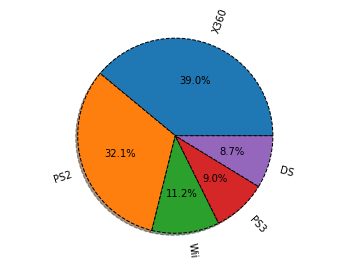

In [ ]:
labels = ['X360','PS2','Wii','PS3','DS']
fig, ax = plt.subplots()
ax.pie(platform_NA, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

#### <b><i>Европа</i></b>

In [ ]:
platform_EU=data_after2014.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
platform_EU=platform_EU[:5]

In [ ]:
print(platform_EU)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64


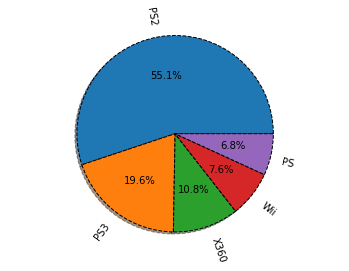

In [ ]:
labels = ['PS2','PS3','X360','Wii','PS']
fig, ax = plt.subplots()
ax.pie(platform_EU, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

#### <b><i>Япония</i></b>

In [ ]:
platform_JP=data_after2014.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
platform_JP=platform_JP[:5]

In [ ]:
print(platform_JP)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


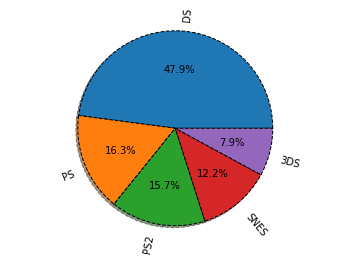

In [ ]:
labels = ['DS','PS','PS2','SNES','3DS']
fig, ax = plt.subplots()
ax.pie(platform_JP, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

<i>Вывод</i>: приведенные выше диаграммы показали, что предпочтения по платформам совпадают у пользователей Европы и Северной Америки относительно PS2 и X360, однако рейтинги в процентном соотношении не совпадают. Совсем другая картина в Японии, там предпочтения относительно PS2 совпадают, отличные популярные платформы: DS, 3DS, PS. Таким образом, в Японии играют преимущественно на отечественных платформах.

### Посмотрим на общее распределение игр по жанрам

#### <b><i>Северная Америка</i></b>

In [ ]:
platform_NA=data_after2014.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
platform_NA=platform_NA[:5]

In [ ]:
print(platform_NA)

genre
shooter         79.02
action          72.53
sports          46.13
role-playing    33.47
misc            15.05
Name: na_sales, dtype: float64


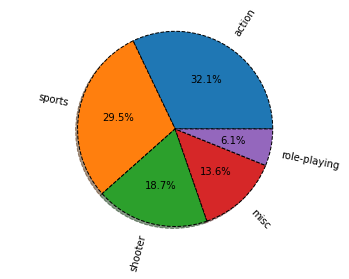

In [ ]:
labels = ['action','sports','shooter','misc','role-playing']
fig, ax = plt.subplots()
ax.pie(platform_NA, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

#### <b><i>Европа</i></b>

In [ ]:
platform_EU=data_after2014.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
platform_EU=platform_EU[:5]

In [ ]:
print(platform_EU)

genre
action          74.68
shooter         65.52
sports          45.73
role-playing    28.17
racing          14.13
Name: eu_sales, dtype: float64


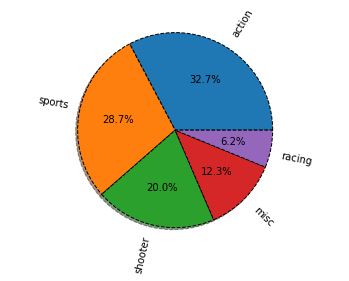

In [ ]:
labels = ['action','sports','shooter','misc','racing']
fig, ax = plt.subplots()
ax.pie(platform_EU, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

#### <b><i>Япония</i></b>

In [ ]:
platform_JP=data_after2014.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
platform_JP=platform_JP[:5]

In [ ]:
print(platform_JP)

genre
role-playing    31.16
action          29.58
fighting         6.37
misc             5.61
shooter          4.87
Name: jp_sales, dtype: float64


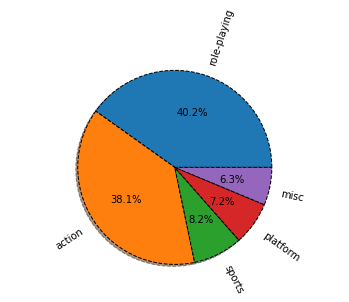

In [ ]:
labels = ['role-playing','action','sports','platform','misc']
fig, ax = plt.subplots()
ax.pie(platform_JP, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
import warnings
warnings.filterwarnings('ignore')

Рейтинги по жанрам в Европе и Северной Америке схожи, там предпочитают <b>action, sports, shooter, misc</b>. Однако в Европе еще популярна <b>racing</b>, а в Северной Америке - <b>role-playing</b>. В Японии популярны те же жанры: <b>action, sports, platform, misc</b>, однако самый популярный жанр - <b>role-playing</b>.

### Посмотрим, влияет ли рейтинг ESRB на продажи по отдельным регионам

Посмотрим как распределены продажи в зависимости от рейтинга ESRB

In [ ]:
print(data_after2014.groupby('rating')['na_sales','eu_sales','jp_sales'].sum())

        na_sales  eu_sales  jp_sales
rating                              
E          50.74     58.06      8.94
E10+       33.23     26.16      4.46
M          96.42     93.44      8.01
T          38.95     34.07     14.78


Для большей наглядности представим данные на круговых диаграммах

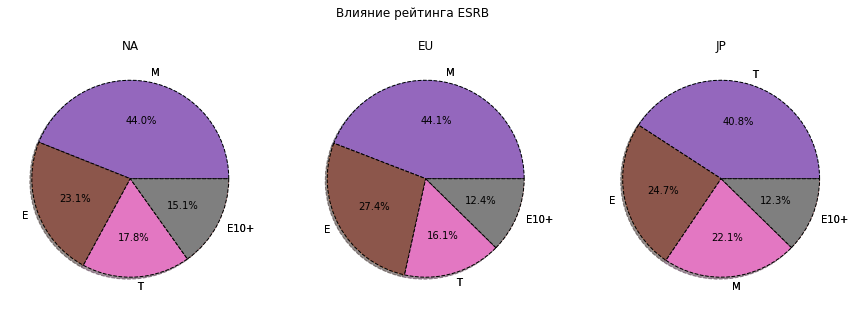

In [ ]:
region = data_after2014.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга ESRB')
for i in range(3):
    platform_esrb = (data_after2014.groupby('rating')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False, ignore_index = True).
             head(5))
    axs[i].pie(platform_esrb[region[i]], labels = platform_esrb['rating'])
    axs[i].pie(platform_esrb[region[i]],labels = platform_esrb['rating'], autopct='%1.1f%%',shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
    axs[i].set_title(platform_esrb.columns[1].split('_')[0].upper())
    ax.axis("equal")
plt.show()

А теперь построим диаграммы с учетом данных по играм, для которых рейтинг не определен

In [ ]:
data_after2014['rating'] = data_after2014['rating'].fillna('unknown')

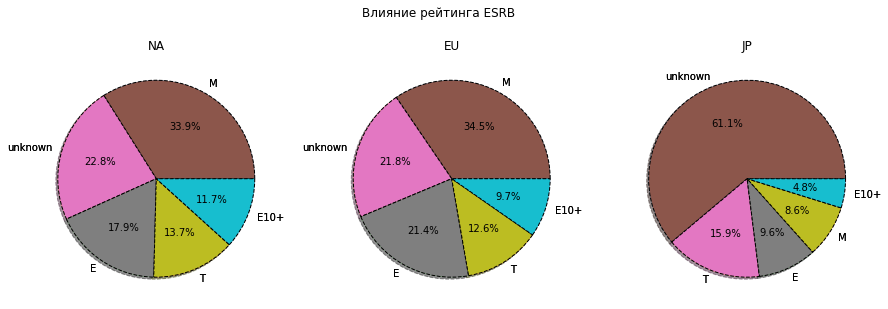

In [ ]:
region = data_after2014.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга ESRB')
for i in range(3):
    platform_esrb = (data_after2014.groupby('rating')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False, ignore_index = True).
             head(5))
    axs[i].pie(platform_esrb[region[i]], labels = platform_esrb['rating'])
    axs[i].pie(platform_esrb[region[i]],labels = platform_esrb['rating'], autopct='%1.1f%%',shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
    axs[i].set_title(platform_esrb.columns[1].split('_')[0].upper())
    ax.axis("equal")
plt.show()

<div class="alert alert-info">Представленные выше данные показывают, что рейтинги компьютерных игр ESRB не влияют на уровень продаж в Японии. Здесь явно нет зависимости от данного рейтинга. Примечательно, что распределение в процентном соотношении предпочтений в Японии весьма заметно отличается от Европы и Северной Америки</div>

## Статистический анализ данных

Проверим две гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки этих гипотез воспользуемся t-test, так как он используется для проверки того, равны ли неизвестные средние значения для данной пары групп. tt позволит нам проверить нулевую гипотезу о том, что средние значения двух групп одинаковые.

### Гипотеза №1
<p><b>H0:</b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</p>
<p><b>H1:</b>Средние пользовательские рейтинги платформ Xbox One и PC различаются</p>

In [ ]:
results=st.ttest_ind(data_after2014[(data_after2014['platform'] =='XOne') &  (data_after2014['user_score'] > 0)]['user_score'],data_after2014[(data_after2014['platform'] =='PC' ) &  (data_after2014['user_score'] > 0)]['user_score'],equal_var=False)

alpha =0.05

print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


<b><i>Вывод:</i></b>нулевая гипотеза не отвергается, значит нет оснований считать, что средние пользовательские рейтинги платформ Xbox One и PC разные.

### Гипотеза №2
<p><b>H0:</b>Средние пользовательские рейтинги жанров Action и Sports одинаковые.</p>
<p><b>H1:</b>Средние пользовательские рейтинги жанров Action и Sports разные.</p>

In [ ]:
results=st.ttest_ind(data_after2014[(data_after2014['genre'] =='action') &  (data_after2014['user_score'] > 0)]['user_score'],data_after2014[(data_after2014['genre'] =='sports' ) &  (data_after2014['user_score'] > 0)]['user_score'],equal_var=False)

alpha =0.05

print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


<b><i>Вывод:</i></b>нулевая гипотеза не подтвердилась, значит данные не противоречат утверждению, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

<ul>
 <li>В проведенном исследовании был использован период с 2006 по 2016 годы. На наш взгляд, более ранний период брать не стоит, так как рынок компьютерных игр очень быстро меняется, то что было популярно на заре компьютерных игр уже устарело.</li>
 <li>При прогнозировании успешности продаж игровых консолей стоит более полагаться на оценки профессиональных критиков, хотя некоторая зависимость от мнения пользователей тоже присутствует.</li>
 <li>Также важным является оценка рейтингового совета по развлекательному программному обеспечению (ESRB). Самыми продаваемыми играми являются игры для всех возрастов и 17+ и игры для подростков.</li>
 <li>Лидерами по продажам на конец рассматриваемого периода можно считать платформы PS4, PSV, XOne, в дальнейшем они еще будут продаваться, однако тенденция к уменьшению продаж присутствует.</li>
 <li>Общая картина по жанрам такая, что самые популярные жанры игр: action, sports,shooter. Менее востребованные жанры: puzzle, adventure ,strategy. </li>
 <li>Однако необходимо уточнять, в каком регионе мы рассматриваем продажи.Для Северной Америки самыми популярными являются игры связанные с спортивной тематикой и экшен-игры. В Европе предпочтения схожи, разница в том, что рейтинг популярности выглядит несколько иначе. В Северной Америке это ролевые игры, а в Европе - гоночные игры. В Японии наоборот, самыми популярными являются ролевые игры.
</ul>